In [13]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
import scipy
from skimage.transform import resize
from PIL import Image
from scipy import ndimage
from dnn_app_utils import *
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
x, y = load_data()

In [15]:
train_x, test_x, train_y, test_y =  train_test_split(x, y, test_size=0.33, random_state=84)

In [16]:
train_x_orig = np.array(train_x)
test_x_orig = np.array(test_x)
train_y = np.array([train_y])
test_y = np.array([test_y])

In [17]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 998
Number of testing examples: 493
Each image is of size: (64, 64, 3)
train_x_orig shape: (998, 64, 64, 3)
train_y shape: (1, 998)
test_x_orig shape: (493, 64, 64, 3)
test_y shape: (1, 493)


In [18]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten
test_x = test_x_flatten

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 998)
test_x's shape: (12288, 493)


In [19]:
def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

In [20]:
def L_layer_model(X, Y, layers_dims, test_x, test_y, learning_rate = 0.007, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = [] # keep track of cost
    prediction_test = [] # keep track of the prediction accuracy
    
    # Parameters initialization.
    parameters = initialize_parameters_he(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)

        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            
            #p, accuracy = predict(test_x, test_y, parameters) #predict the test_data
            #print("Accuracy: {0}".format(accuracy))
            
            print ("Cost after iteration %i: %f" %(i, cost))            
            print("---------------------------------------")
            
            costs.append(cost)
            #prediction_test.append(float(accuracy))
        

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.plot(np.squeeze(prediction_test), 'ro')
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.grid(True)
    plt.show()
    
    return parameters

In [21]:
layers_dims = [12288, 20, 20, 20, 15, 10, 7, 5, 1] #  4-layer model

Cost after iteration 0: 0.663052
---------------------------------------
Cost after iteration 100: 0.568819
---------------------------------------
Cost after iteration 200: 0.500663
---------------------------------------
Cost after iteration 300: 0.508025
---------------------------------------
Cost after iteration 400: 0.393038
---------------------------------------
Cost after iteration 500: 0.490292
---------------------------------------
Cost after iteration 600: 0.333023
---------------------------------------
Cost after iteration 700: 0.443634
---------------------------------------
Cost after iteration 800: 0.248245
---------------------------------------
Cost after iteration 900: 0.217459
---------------------------------------
Cost after iteration 1000: 0.254199
---------------------------------------
Cost after iteration 1100: 0.174675
---------------------------------------
Cost after iteration 1200: 0.271272
---------------------------------------
Cost after iteration 130

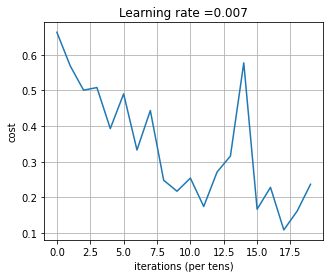

In [22]:
parameters = L_layer_model(train_x, train_y, layers_dims, test_x, test_y, num_iterations = 2000, print_cost = True)

In [18]:
pred_train, acc = predict(train_x, train_y, parameters)
print("Acc: ", acc) # 0.9880358923230306

Acc:  0.9980059820538382


In [19]:
pred_test, acc = predict(test_x, test_y, parameters)
print("Acc: ", acc) # 0.7414141414141412

Acc:  0.7737373737373736


In [19]:
analysis = false_and_positives_analysis(pred_test, test_y)

The number of FALSE POSITIVES were:  50
The number of FALSE NEGATIVES were:  63
The number of TRUE POSITIVES were:  263
The number of TRUE NEGATIVES were:  119


In [14]:
my_image_loads = "pizza_img.jpg" # change this to the name of your image file 
my_label_y = [0] # the true class of your image (1 -> pizza, 0 -> non-pizza)

In [15]:
img = mpimg.imread(my_image_loads)
plt.imshow(img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'pizza_img.jpg'

In [ ]:
fname = my_image_loads
image = np.array(imread(fname))
my_image = resize(image, (num_px,num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
plt.show()